# Challenge Set 5 - Alison Glazer
Topic: Challenge Set 5 Subject: Explore MTA turnstile data Date: 10/13/2019 Name: Alison Glazer Worked with: -- Location: https://github.com/alisonglazer/metis_challenges/blob/master/challenge_set_5_alison.ipynb

In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [98]:
# Import libraries
import pandas as pd
import statsmodels.api as sm
import patsy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [71]:
df = pd.read_csv('challenges_data/2013_movies.csv')

In [72]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


## **CHALLENGE 1**

In [75]:
# Create a constant column of ones
df['intercept'] = 1

y,X = patsy.dmatrices('DomesticTotalGross ~ intercept', data = df, return_type='dataframe')

lm_c1 = sm.OLS(y, X, data=df) # Instantiate and train model

results = lm_c1.fit() # Fit model, generate results

results.summary() # Summarize model

/anaconda3/envs/metis/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Sun, 13 Oct 2019   Prob (F-statistic):                nan
Time:                        13:56:30   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
intercept    5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                     7.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

With an $R^2$ value of 0, the model is no better than predicting the mean. Given that the only feature is a constant term, with a scalar coefficient equal to the mean divided by the constant (in this case 1) it will only ever predict the mean value of the target.

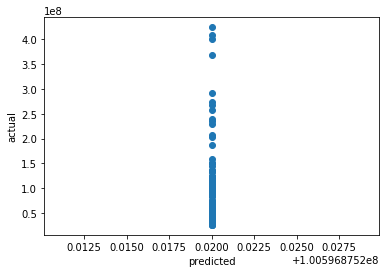

In [33]:
# Plot predictions vs outcome
y_pred = results.predict()

plt.scatter(y_pred,y)
plt.xlabel('predicted')
plt.ylabel('actual');

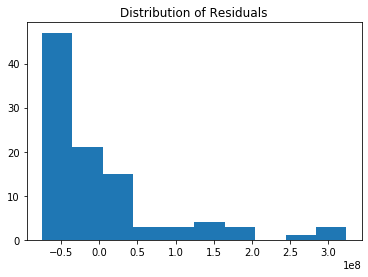

In [47]:
# Plot the residuals
resid = df.DomesticTotalGross-y_pred
plt.hist(resid)
plt.title('Distribution of Residuals');

The residual distribution is skewed right. This would mirror the distribution of the target

## **CHALLENGE 2**

In [55]:
# Add extra numeric feature (runtime)

y,X = patsy.dmatrices('DomesticTotalGross ~ intercept + Runtime', data = df, return_type='dataframe')

lm_c2 = sm.OLS(y, X, data=df) # Instantiate and train model

results2 = lm_c2.fit() # Fit model, generate results

results2.summary() # Summarize model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     9.180
Date:                Sun, 13 Oct 2019   Prob (F-statistic):            0.00313
Time:                        13:37:18   Log-Likelihood:                -1965.5
No. Observations:                 100   AIC:                             3935.
Df Residuals:                      98   BIC:                             3940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.862e+07   2.64e+07     -1.085      0.281    -8.1e+07    2.37e+07
intercept  -2.862e+07   2.64e+07     -1.085      0.281    -8.1e+07    2.37e+07
Runtime     1.406e+06   4.64e+05      3.030      0.003    4.85e+05    2.33e+06
==============================================================================
Omnibus:                       50.222   Durbin-Watson:                   0.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.001
Skew:                           1.932   Prob(JB):                     7.19e-28
Kurtosis:                       6.883   Cond. No.                     6.42e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

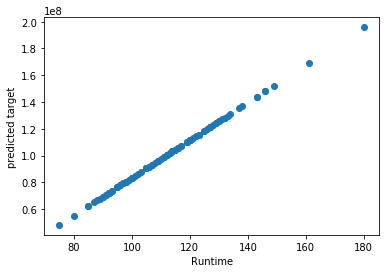

In [56]:
# Plot predictions vs feature variable
y_pred = results2.predict()

plt.scatter(df.Runtime,y_pred)
plt.xlabel('Runtime')
plt.ylabel('predicted target');

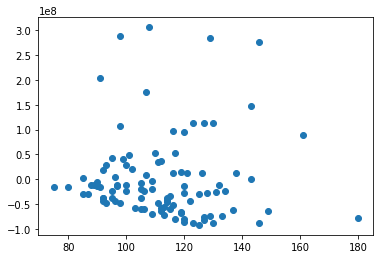

In [58]:
# Calculate residuals

resid = df.DomesticTotalGross - y_pred

# Plot residuals vs runtime

plt.scatter(df.Runtime, resid);

Hard to tell what is happening in the model. The $R^2$ value went up a little bit. The prediction is a linear function of the Runtime feature variable. Since the target is bounded at zero, the residuals are not normally distributed around a mean of zero

## **CHALLENGE 3**

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,intercept
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [73]:
# Add dummy variable columns for ratings
df = df.merge(pd.get_dummies(df['Rating'],drop_first=True),right_index=True,left_index=True)

df.rename(columns={'PG-13':'PG13'},inplace=True)

In [76]:
# Set up the feature and target matrices

y,X = patsy.dmatrices('DomesticTotalGross ~ intercept + Runtime + PG + PG13 + R', data = df, return_type='dataframe')

lm_c3 = sm.OLS(y, X, data=df) # Instantiate and train model

results3 = lm_c3.fit() # Fit model, generate results

results3.summary() # Summarize model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     6.497
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           0.000115
Time:                        13:56:35   Log-Likelihood:                -1957.9
No. Observations:                 100   AIC:                             3926.
Df Residuals:                      95   BIC:                             3939.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.559e+07   4.67e+07      0.977      0.331   -4.71e+07    1.38e+08
intercept   4.559e+07   4.67e+07      0.977      0.331   -4.71e+07    1.38e+08
Runtime     1.657e+06   4.64e+05      3.574      0.001    7.37e+05    2.58e+06
PG         -1.256e+08   8.17e+07     -1.538      0.127   -2.88e+08    3.66e+07
PG13       -1.745e+08      8e+07     -2.180      0.032   -3.33e+08   -1.56e+07
R          -2.048e+08   8.01e+07     -2.555      0.012   -3.64e+08   -4.57e+07
==============================================================================
Omnibus:                       43.608   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.295
Skew:                           1.721   Prob(JB):                     2.03e-21
Kurtosis:                       6.319   Cond. No.                     8.86e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

$R^2$ went up even more, up to 0.215 (0.186 for adjusted due to the increased number of features). It is a better predictor with the added features

## **CHALLENGE 4**

In [82]:
# Create column with month released

df['Month'] = pd.to_datetime(df.ReleaseDate).dt.month

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
PG                    100 non-null uint8
PG13                  100 non-null uint8
R                     100 non-null uint8
intercept             100 non-null int64
Month                 100 non-null int64
dtypes: float64(1), int64(4), object(4), uint8(3)
memory usage: 7.4+ KB


In [94]:
# Drop columns with no budget amount in new df

small_df = df.dropna(subset=['Budget'])

In [96]:
# Set up the feature and target matrices

y,X = patsy.dmatrices('DomesticTotalGross ~ intercept + Runtime + PG + PG13 + R + Budget + Month', data = small_df, return_type='dataframe')

lm_c4 = sm.OLS(y, X, data=df) # Instantiate and train model

results4 = lm_c4.fit() # Fit model, generate results

results4.summary() # Summarize model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     7.218
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           1.18e-05
Time:                        14:04:03   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3486.
Df Residuals:                      83   BIC:                             3501.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.102e+06   2.33e+07     -0.262      0.794   -5.25e+07    4.03e+07
intercept  -6.102e+06   2.33e+07     -0.262      0.794   -5.25e+07    4.03e+07
Runtime     5.499e+05   5.51e+05      0.998      0.321   -5.46e+05    1.65e+06
PG          1.459e+07   1.58e+07      0.925      0.358   -1.68e+07     4.6e+07
PG13        -1.17e+07   1.55e+07     -0.753      0.453   -4.26e+07    1.92e+07
R          -8.996e+06   1.65e+07     -0.545      0.587   -4.18e+07    2.38e+07
Budget         0.7160      0.170      4.208      0.000       0.378       1.055
Month       8.671e+05   2.54e+06      0.342      0.733   -4.18e+06    5.91e+06
==============================================================================
Omnibus:                       35.764   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.218
Skew:                           1.485   Prob(JB):                     1.04e-17
Kurtosis:                       6.503   Cond. No.                     1.83e+25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model performance improved slightly with the additional features

## **CHALLENGE 5**

In [117]:
# Set up the feature and target matrices

y,X = patsy.dmatrices('DomesticTotalGross ~ intercept + Runtime + PG + PG13 + R + Budget + Month', data=df, return_type='dataframe')

# 75/25 split train+val / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

lm_c5 = sm.OLS(y_train, X_train, data=df) # Instantiate and train model

results5 = lm_c5.fit() # Fit model, generate results

results5.summary() # Summarize model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     4.475
Date:                Sun, 13 Oct 2019   Prob (F-statistic):            0.00157
Time:                        14:15:00   Log-Likelihood:                -1288.6
No. Observations:                  66   AIC:                             2589.
Df Residuals:                      60   BIC:                             2602.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.228e+07   2.82e+07      0.436      0.665   -4.41e+07    6.87e+07
intercept   1.228e+07   2.82e+07      0.436      0.665   -4.41e+07    6.87e+07
Runtime     1.998e+05   6.48e+05      0.308      0.759    -1.1e+06     1.5e+06
PG          2.321e+07   1.76e+07      1.318      0.192    -1.2e+07    5.84e+07
PG13       -1.105e+07   1.87e+07     -0.592      0.556   -4.84e+07    2.63e+07
R           1.301e+05   2.09e+07      0.006      0.995   -4.16e+07    4.19e+07
Budget         0.7292      0.219      3.332      0.001       0.291       1.167
Month      -3.039e+05   2.99e+06     -0.101      0.920   -6.29e+06    5.69e+06
==============================================================================
Omnibus:                       26.131   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.109
Skew:                           1.433   Prob(JB):                     2.64e-10
Kurtosis:                       5.797   Cond. No.                     8.16e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

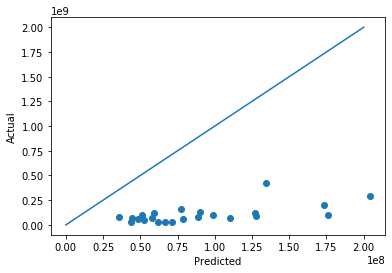

In [124]:
y_pred = results5.predict(X_test)
plt.scatter(y_pred,y_test)
plt.plot([0,200000000], [0,2000000000])
plt.xlabel('Predicted')
plt.ylabel('Actual');